First, import the library and create a blank abstract argumentation framework:

# Welcome to the ALIAS Demonstration Notebook!
This Ipython Notebook aims to demonstrate the key functionality of the ALIAS library.

In [1]:
import alias as al
example = al.ArgumentationFramework('Example')

Lets add a few arguments to the framework we've called 'Example':

In [2]:
example.add_argument('a')
example.add_argument('b')
example.add_argument('c')
# Arguments can also be passed as a list or tuple
# e.g: example.add_argument(['a','b,'c'])

Now, lets create some attacks between these arguments:

In [4]:
example.add_attack(('a','b'))
example.add_attack(('b','c'))
# Attacks can also be passed as a list or a tuple 
# by using the optional parameter 'atts'
# e.g: example.add_attack(atts=[('a', 'b'), ('b', 'c')])  

We have created an Argumentation Framework called example which contains three arguments and two attacks.  For a string representation of the Framework, simply call print on it:

In [5]:
print example

ArgumentationFramework 'Example' : {'a' : ['b'], 'c' : [], 'b' : ['c']}


Argument objects belonging to a framework can be referenced by name like so:

In [7]:
arga = example['a']
print example.get_attackers('b')
print arga

set(['a'])
Argument 'a' : ['b']


ALIAS utilises NetworkX's drawing library to provide visual representations of Argumentation Frameworks.  Lets draw our AF 'example' using the `draw_framework()` function:

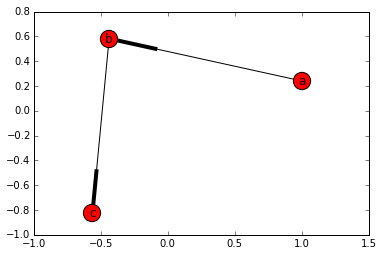

In [6]:
# Creating drawings requires 
# matplotlib and NetworkX (NetworkX is imported by ALIAS internally)
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Call ALIAS' drawing facility on our AF
al.draw_framework(example)

Lets apply a labelling to our AF.  We can use ALIAS' built-in `generate_all_in()` function to generate an "All-In labelling" for our framework.

In [7]:
# Call the generate_all_in() function on the example AF
allin = example.generate_all_in()
print allin
# Labellings are updated dynamically when the AF is updated
example.add_argument('d')
print allin
example.remove_argument('d')
print allin

Labelling 'All-In' : {in : ['a', 'c', 'b'] out : [] undecided : [] undefined : []}
Labelling 'All-In' : {in : ['a', 'c', 'b'] out : [] undecided : [] undefined : ['d']}
Labelling 'All-In' : {in : ['a', 'c', 'b'] out : [] undecided : [] undefined : []}


`draw_framework()` can also take a labelling as an argument to colour code the arguments in the representation:

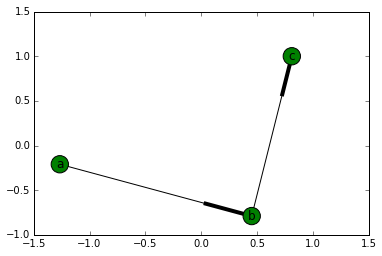

In [8]:
al.draw_framework(example, labelling=allin)

Lets apply some semantics to our AF.  ALIAS can handle both extension-based and labelling-based semantics.

In [9]:
preflab = al.labelling_preferred(example)
print preflab

Labelling semantic functions return a list of all labellings for the given framework that satisfy the constraints of the chosen semantics.

Labelling 'All-In' : {in : ['a', 'c'] out : ['b'] undecided : [] undefined : []}


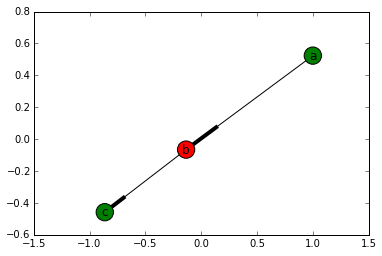

In [10]:
print preflab[0]
al.draw_framework(example, labelling=preflab[0])

Lets try some extension based semantics.  These functions take the power set of all arguments in the framework and applys filtering to find the chosen semantics.  (Labellings can also be converted to extension using the function `labelling.lab2ext()`)

In [11]:
stabext = example.extension_stable()
print stabext

[frozenset(['a', 'c'])]


ALIAS can perform file input and output operations on .apx, .dot and .tgf files.  Lets load an aspartix file to demonstrate this functionality.

In [8]:
exampleapx = al.read_apx('example-apx.apx')
print exampleapx

ArgumentationFramework 'example-apx.apx' : {'a' : ['b'], 'c' : ['b'], 'b' : [], 'd' : ['c']}


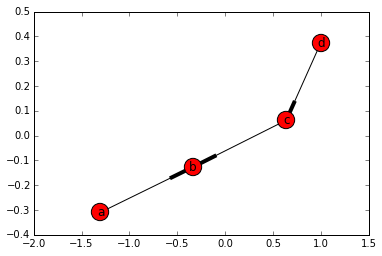

In [13]:
al.draw_framework(exampleapx)

In [14]:
grounded = al.labelling_grounded(exampleapx)

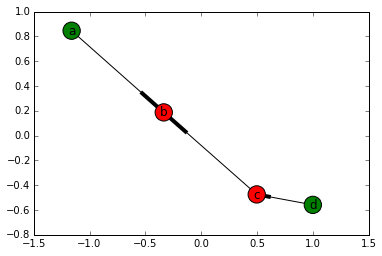

In [15]:
al.draw_framework(exampleapx, labelling=grounded)

In [16]:
pref = al.labelling_preferred(exampleapx)

In [17]:
print pref

In [18]:
print pref[0]

Labelling 'All-In' : {in : ['a', 'd'] out : ['c', 'b'] undecided : [] undefined : []}


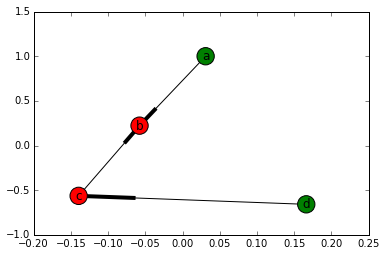

In [19]:
al.draw_framework(exampleapx, labelling=pref[0])

In [9]:
al.to_neo4j(af=exampleapx, u='neo4j', p='test')

In [11]:
f = al.from_neo4j(framework='exampleapx', u='neo4j', p='test')

In [12]:
print f

ArgumentationFramework 'exampleapx' : {}


In [14]:
db = al.Dbwrapper()
db.to_sqlite(exampleapx)

UnmappedInstanceError: Class 'alias.classes.framework.ArgumentationFramework' is mapped, but this instance lacks instrumentation.  This occurs when the instanceis created before sqlalchemy.orm.mapper(alias.classes.framework.ArgumentationFramework) was called.